<a href="https://colab.research.google.com/github/amrios80/eda-jobs/blob/master/caoba/caoba_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENDEPORTE-EDA Parte 2

MINE-4101: Applied Data Science  
Universidad de los Andes  
  
**Datasets:** : ultimo_semestre.csv


**Business Context:** Se requiere conocer que variables mas inciden sobre la desercion academica.

**Restricciones:** Se tiene la variable 'target' con los valores 1:no-retirados y 0:retirados
-

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# **1. Reporte de calidad y preparacion de los datos**

 **1.1 Cargue Dataset.** Se observa: 10021 filas.

In [2]:
ultimo_semestre_url="https://github.com/amrios80/eda-jobs/raw/refs/heads/main/caoba/ultimo_semestre.csv"
ultimo_semestre_df = pd.read_csv(ultimo_semestre_url, sep=";")
print("dimensiones:",ultimo_semestre_df.shape)


dimensiones: (10021, 33)


 **1.2 Revision de retirados y no retirados.** Se observan: 8770 no-retirados y 1251 retirados

In [3]:
df=ultimo_semestre_df.copy()
df["target"].value_counts()

,count
target,
1,8770
0,1251


In [4]:
df.sample(3)

,PERIODO_ACAENICO,CODIGO,UNIDAD,CODIGOPROGRAMA,PROGRAMA,SEMESTRE,PROMEDIOSEMESTRE,GENERO,FECHANACIMIENTO,ESTRATO,CIUDADRESIDENCIA,DEPARTAMENTORESICEDENCIA,ESTADOCIVIL,PROMEDIOGENERAL,SITUACION_ACTUAL,CATEGORIA_ACTUAL,SITUACION_DEL_PERIODO,CATEGORIA_DEL_PERIODO,DISCAPACIDAD,TIPO_DISCAPACIDAD,FECHA_MATRICULA,IDCIUDADNACIMIENTO,IDDEPARTAMENTONACIMIENTO,SISBEN,NIVELSISBEN,CANTIDAD,PERIODO,EDAD2,EDAD,FACULTAD,NIVEL_FORMACION,YEARNACIMIENTO,target
6796,2017 - 1,7306122159,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,9,4.4,Masculino,10-11-1992,2.0,BOLIVAR,VALLE DEL CAUCA,Soltero,3.7,EXCLUIDO NO RENOVACION DE MATRICULA,CONTINUIDAD ACADEMICA - EGRESADO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,23/01/17,76100.0,76.0,0.0,NaN,1,2017-I,25,Edad entre 18 y 25 años,Fac. Salud,Universitrario,1992,1
8690,2024 - 1,7306231234,ESCUELA NACIONAL DEL DEPORTE,7306,FISIOTERAPIA,3,4.3,Femenino,01-05-2004,2.0,GUACARI,VALLE DEL CAUCA,Soltero,4.5,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,02/01/24,76111.0,76.0,0.0,NaN,1,2024-I,20,Edad entre 18 y 25 años,Fac. Salud,Universitrario,2004,1
5003,2024 - 1,53212221077,ESCUELA NACIONAL DEL DEPORTE,53212,DEPORTE,5,4.3,Masculino,24-07-2001,3.0,TUNJA,BOYACÁ,Soltero,4.3,ACTIVO,ANTIGUO,ACTIVO,ANTIGUO,NINGUNA,NINGUNA,02/01/24,15001.0,15.0,0.0,NaN,1,2024-I,23,Edad entre 18 y 25 años,Fac. Deporte,Universitrario,2001,1


 **1.3 Determinación de la importancia de variables.** Se entrena un clasificador RandomForest y luego se presenta la importancia de las variables utilizadas por el clasificador. Se observan en orden de importancia las variables: ['YEARNACIMIENTO', 'PROMEDIOSEMESTRE','EDAD2','FECHANACIMIENTO', 'PROMEDIOGENERAL','IDCIUDADNACIMIENTO','ESTRATO','SITUACION_DEL_PERIODO','CIUDADRESIDENCIA','CATEGORIA_DEL_PERIODO','CODIGOPROGRAMA','PROGRAMA','IDDEPARTAMENTONACIMIENTO','EDAD','GENERO','FACULTAD','NIVELSISBEN','SISBEN','DEPARTAMENTORESIDENCIA','DISCAPACIDAD','TIPO_DISCAPACIDAD','ESTADOCIVIL','NIVEL_FORMACION','UNIDAD','CANTIDAD']


Feature ranking:
1. YEARNACIMIENTO (0.1451)
2. PROMEDIOSEMESTRE (0.1376)
3. EDAD2 (0.1346)
4. FECHANACIMIENTO (0.1142)
5. PROMEDIOGENERAL (0.0887)
6. IDCIUDADNACIMIENTO (0.0466)
7. ESTRATO (0.0428)
8. SITUACION_DEL_PERIODO (0.0368)
9. CIUDADRESIDENCIA (0.0357)
10. CATEGORIA_DEL_PERIODO (0.0254)
11. CODIGOPROGRAMA (0.0249)
12. PROGRAMA (0.0242)
13. IDDEPARTAMENTONACIMIENTO (0.0217)
14. EDAD (0.0184)
15. GENERO (0.0165)
16. FACULTAD (0.0146)
17. NIVELSISBEN (0.0139)
18. SISBEN (0.0132)
19. DEPARTAMENTORESICEDENCIA (0.0102)
20. DISCAPACIDAD (0.0100)
21. TIPO_DISCAPACIDAD (0.0089)
22. ESTADOCIVIL (0.0079)
23. NIVEL_FORMACION (0.0061)
24. UNIDAD (0.0018)
25. CANTIDAD (0.0000)


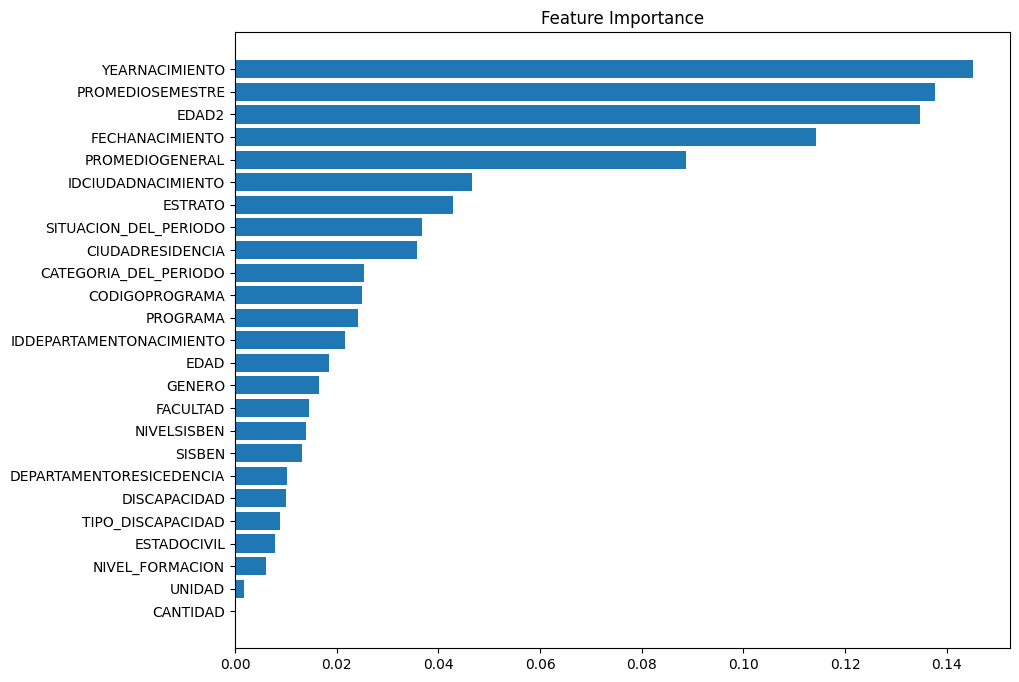

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

def correlation_matrix(df):
    # Assuming df is your DataFrame and 'target' is your target column
    correlation_matrix = df.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

    # Get the correlation values of all features with respect to the target
    correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
    print(correlation_with_target)

def tree_importance(df, target_var="target"):
  # Load data (assuming your DataFrame is named df)
  # Replace non-numeric columns with numeric ones
  df = df.copy()

  # Encode categorical columns
  label_encoder = LabelEncoder()
  for col in df.select_dtypes(include=['object']).columns:
      df[col] = label_encoder.fit_transform(df[col].astype(str))

  # Define features and target
  X = df.drop(columns='target')
  y = df['target']

  # Split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

  # Train a Random Forest model
  rf = RandomForestClassifier(n_estimators=100, random_state=42)
  rf.fit(X_train, y_train)

  # Get feature importance
  importances = rf.feature_importances_
  indices = np.argsort(importances)[::-1]

  # Print feature importance rankings
  print("Feature ranking:")
  for f in range(X_train.shape[1]):
      print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

  # Plot feature importance
  plt.figure(figsize=(10, 8))
  plt.title("Feature Importance")
  plt.barh(range(X_train.shape[1]), importances[indices], align="center")
  plt.yticks(range(X_train.shape[1]), X.columns[indices])
  plt.gca().invert_yaxis()
  plt.show()
  return df

exclude=["SITUACION_ACTUAL", "PERIODO_ACAENICO","PERIODO","CATEGORIA_ACTUAL","FECHA_MATRICULA","CODIGO","SEMESTRE" ]

df_copy=df.copy()
for i in exclude:
  df_copy.drop(columns=[i], inplace=True)

df_copy=tree_importance(df_copy)

Correlacion contra la variable target

In [6]:
def show_corr_target(df):
  # Step 1: Compute the correlation matrix
  corr_matrix = df.corr()

  # Step 2: Flatten the correlation matrix and keep track of the column pairs
  corr_pairs = (
      corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Only upper triangle (avoid duplicates)
      .stack()  # Convert to long-form
      .reset_index()  # Convert index to columns
  )

  corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

  # Step 3: Sort by absolute correlation value
  corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
  sorted_corr = corr_pairs[  (corr_pairs['Column 1']=='target')|(corr_pairs['Column 2']=='target')   ].sort_values(by='Abs Correlation', ascending=False)[:30]

  # Step 4: Display the top results
  print(sorted_corr)

show_corr_target(df_copy)

                     Column 1 Column 2  Correlation  Abs Correlation
89           PROMEDIOSEMESTRE   target     0.141741         0.141741
208           PROMEDIOGENERAL   target     0.109470         0.109470
233     CATEGORIA_DEL_PERIODO   target    -0.093286         0.093286
298           NIVEL_FORMACION   target     0.086841         0.086841
109                    GENERO   target    -0.079262         0.079262
299            YEARNACIMIENTO   target     0.062973         0.062973
296                  FACULTAD   target     0.055359         0.055359
284               NIVELSISBEN   target     0.054261         0.054261
289                     EDAD2   target     0.050074         0.050074
146                   ESTRATO   target    -0.041645         0.041645
46             CODIGOPROGRAMA   target     0.032148         0.032148
163          CIUDADRESIDENCIA   target     0.026938         0.026938
23                     UNIDAD   target     0.023567         0.023567
254         TIPO_DISCAPACIDAD   ta

 **1.4 Calculo de correlación entre variables.**  Se encuentran pares de variables correlacionadas y se descarta una de ellas quedando unicamente: ['YEARNACIMIENTO', 'PROMEDIOSEMESTRE','EDAD2','PROMEDIOGENERAL','IDCIUDADNACIMIENTO','ESTRATO','SITUACION_DEL_PERIODO','CIUDADRESIDENCIA','CATEGORIA_DEL_PERIODO','CODIGOPROGRAMA','GENERO','FACULTAD','NIVELSISBEN','TIPO_DISCAPACIDAD','ESTADOCIVIL','UNIDAD','CANTIDAD']

In [7]:
def show_corr(df):
  # Step 1: Compute the correlation matrix
  corr_matrix = df.corr()

  # Step 2: Flatten the correlation matrix and keep track of the column pairs
  corr_pairs = (
      corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Only upper triangle (avoid duplicates)
      .stack()  # Convert to long-form
      .reset_index()  # Convert index to columns
  )

  corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']

  # Step 3: Sort by absolute correlation value
  corr_pairs['Abs Correlation'] = corr_pairs['Correlation'].abs()
  sorted_corr = corr_pairs.sort_values(by='Abs Correlation', ascending=False)[:30]

  # Step 4: Display the top results
  print(sorted_corr)

show_corr(df_copy)

                     Column 1                  Column 2  Correlation  \
255        IDCIUDADNACIMIENTO  IDDEPARTAMENTONACIMIENTO     0.990429   
288                     EDAD2            YEARNACIMIENTO    -0.909532   
285                     EDAD2                      EDAD     0.871439   
292                      EDAD            YEARNACIMIENTO    -0.789637   
75           PROMEDIOSEMESTRE           PROMEDIOGENERAL     0.776700   
76           PROMEDIOSEMESTRE     SITUACION_DEL_PERIODO    -0.743418   
195           PROMEDIOGENERAL     SITUACION_DEL_PERIODO    -0.624812   
171  DEPARTAMENTORESICEDENCIA  IDDEPARTAMENTONACIMIENTO     0.574378   
170  DEPARTAMENTORESICEDENCIA        IDCIUDADNACIMIENTO     0.571509   
66                   PROGRAMA           NIVEL_FORMACION    -0.536440   
234              DISCAPACIDAD         TIPO_DISCAPACIDAD     0.465232   
65                   PROGRAMA                  FACULTAD     0.416352   
147          CIUDADRESIDENCIA  DEPARTAMENTORESICEDENCIA    -0.36

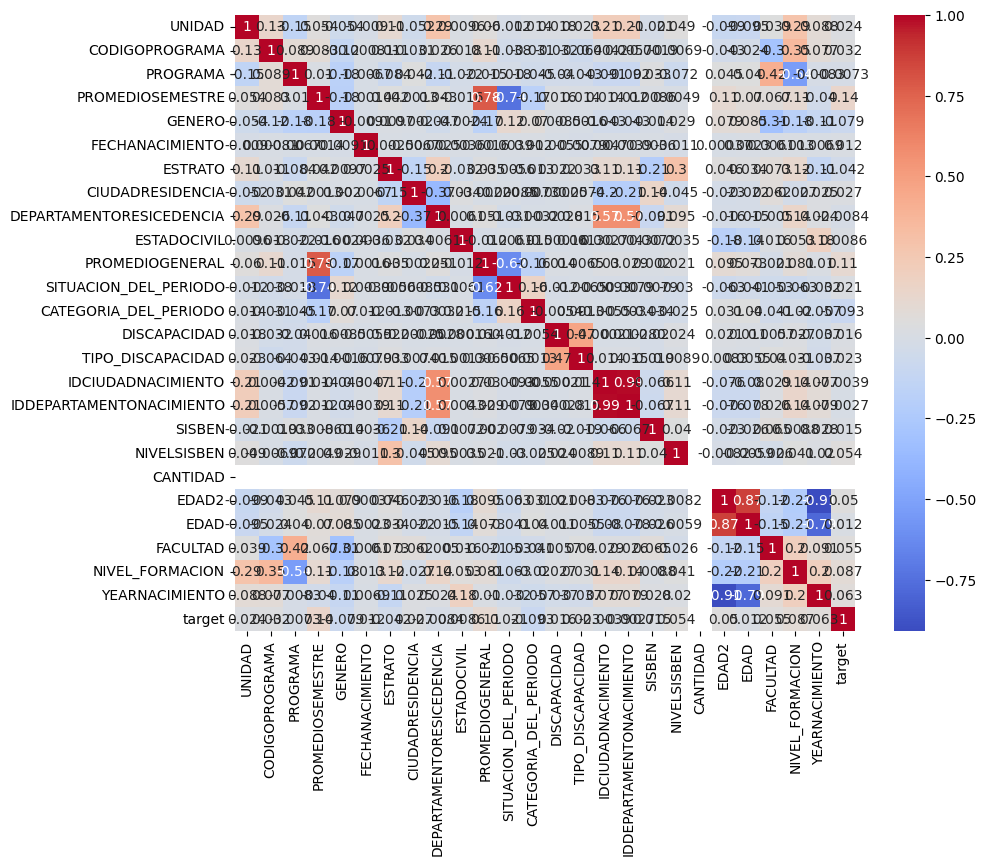

target                      1.000000
PROMEDIOSEMESTRE            0.141741
PROMEDIOGENERAL             0.109470
NIVEL_FORMACION             0.086841
YEARNACIMIENTO              0.062973
FACULTAD                    0.055359
NIVELSISBEN                 0.054261
EDAD2                       0.050074
CODIGOPROGRAMA              0.032148
CIUDADRESIDENCIA            0.026938
UNIDAD                      0.023567
TIPO_DISCAPACIDAD           0.023354
SITUACION_DEL_PERIODO       0.021438
DISCAPACIDAD                0.016463
SISBEN                      0.014690
EDAD                        0.012455
FECHANACIMIENTO             0.011653
ESTADOCIVIL                 0.008585
IDDEPARTAMENTONACIMIENTO   -0.002749
IDCIUDADNACIMIENTO         -0.003888
PROGRAMA                   -0.007330
DEPARTAMENTORESICEDENCIA   -0.008447
ESTRATO                    -0.041645
GENERO                     -0.079262
CATEGORIA_DEL_PERIODO      -0.093286
CANTIDAD                         NaN
Name: target, dtype: float64


In [8]:
correlation_matrix(df_copy)

 **1.5 Exploracion de variables.**

**1.5.1 Variables a considerar:** Las siguientes variables se identifican como importantes para el analisis:

important=['YEARNACIMIENTO', 'PROMEDIOSEMESTRE','EDAD2','PROMEDIOGENERAL','IDCIUDADNACIMIENTO','ESTRATO','SITUACION_DEL_PERIODO','CIUDADRESIDENCIA','CATEGORIA_DEL_PERIODO','CODIGOPROGRAMA','GENERO','FACULTAD','NIVELSISBEN','TIPO_DISCAPACIDAD','ESTADOCIVIL','UNIDAD','CANTIDAD']



In [63]:
#Funciones para revision de las variables.
def histogram(df , field="price"):
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(df[field], bins=10, kde=True)
  plt.title(f'{field} Distribution')
  plt.xlabel(field)
  plt.ylabel('Frequency')
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df[field])
  plt.title(f'{field} Boxplot')
  plt.xlabel(field)
  plt.tight_layout()
  plt.show()


pd.set_option('display.float_format', '{:.2f}'.format)
def statistics(df , field="price"):
  print(f"Statistics for {field}:")
  print(df[field].describe( percentiles=[0.25, 0.50, 0.75, 0.95]))
  if pd.api.types.is_numeric_dtype(df[field]):
     q1 = df[field].quantile(0.25)
     q3 = df[field].quantile(0.75)
     iqr = q3 - q1
     lower_bound = q1 - 1.5 * iqr
     upper_bound = q3 + 1.5 * iqr
     outliers = df[(df[field] < lower_bound) | (df[field] > upper_bound)]
     print(f"\nOutliers in {field}:", outliers.shape[0])


def print_top(df,field="brand"):
   top_10_brands = df[field].value_counts().head(10).index.tolist()
   print(top_10_brands)
   return top_10_brands

def histogram_object(df , field="brand"):
  qty=len(df[field].value_counts())
  data={}
  if qty > 10:
    data=df[field].value_counts()[:10]
  else:
    data=df[field].value_counts()
  fig, (ax1) = plt.subplots(1, sharey=True, figsize=(20, 5))
  data.plot(kind="bar", ax=ax1, color="green")
  ax1.set_title(field)
  plt.show()

def print_pie(df, field="brand", title=""):
  threshold=16
  value_counts = df[field].value_counts()
  qty=len(value_counts)
  if qty > threshold:
    other_cats_sum=value_counts[threshold:].sum()
    value_counts = value_counts[:threshold]
    value_counts['Otros'] = other_cats_sum
  else:
    value_counts = value_counts
  plt.figure(figsize=(6, 6))
  value_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
  plt.ylabel('')  # Remove the y-axis label
  plt.title(f'Distribution of Values in {field} {title} ')
  plt.show()


def line_graph(df, field="brand", x_var="price"):
  density_var=field

  top_brands = df[field].value_counts().head(10).index.tolist()
  marcas_frec_cumsum=df[field].value_counts(normalize=True).cumsum()

  q1 = df[x_var].quantile(0.25)
  q2 = df[x_var].quantile(0.50)
  q3 = df[x_var].quantile(0.75)
  iqr = q3 - q1

  fig, ax = plt.subplots(1, 1, figsize=(20, 8))
  sns.kdeplot(
      data=df.loc[df[x_var] <= (q3 + 1.5 * iqr)].loc[df[field].isin( top_brands )],
      x=x_var,
      hue=field,
      bw_adjust=.3,
      ax=ax
  )
  for (brand, color) in zip( marcas_frec_cumsum , ["steelblue", "orange", "green"]):
      ax.axvline(df.loc[df[ x_var ] <= (q3 + 1.5 * iqr)].loc[df[ density_var] == brand, density_var].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
  plt.title(f"{x_var} distribution by {density_var} (with means)")
  if "YEAR" in x_var :
    #plt.xscale("log")
    plt.xlim(1950, 2025)  # Set x-axis limits

  plt.show()



In [51]:
important=['YEARNACIMIENTO', 'PROMEDIOSEMESTRE','EDAD2','PROMEDIOGENERAL','IDCIUDADNACIMIENTO','ESTRATO','SITUACION_DEL_PERIODO','CIUDADRESIDENCIA','CATEGORIA_DEL_PERIODO','CODIGOPROGRAMA','GENERO','FACULTAD','NIVELSISBEN','TIPO_DISCAPACIDAD','ESTADOCIVIL','UNIDAD','CANTIDAD']
importat_cont=['YEARNACIMIENTO', 'PROMEDIOSEMESTRE','EDAD2','PROMEDIOGENERAL']
important_cat=['IDCIUDADNACIMIENTO','ESTRATO','SITUACION_DEL_PERIODO','CIUDADRESIDENCIA','CATEGORIA_DEL_PERIODO','CODIGOPROGRAMA','GENERO','FACULTAD','NIVELSISBEN','TIPO_DISCAPACIDAD','ESTADOCIVIL','UNIDAD','CANTIDAD']

top target: [1, 0]


<Figure size 12000x600 with 0 Axes>

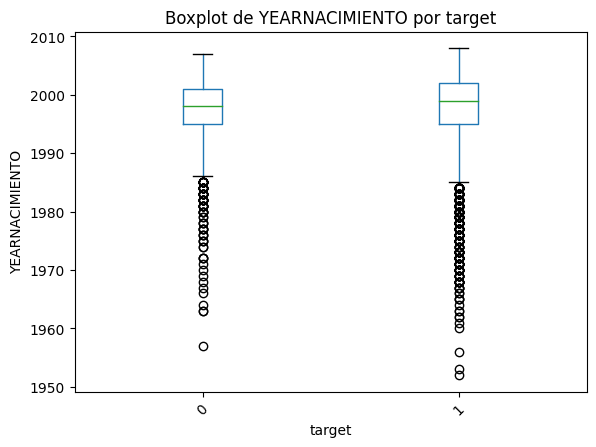

In [49]:
def comparative_boxplot(df, field, target_var="target"):
  field_count = df[field].value_counts(dropna=False, normalize=True)
  top = field_count.index.tolist()
  if len(top) > 10:
    top = top[:10]
  print(f"top {field}:", top)
  plt.figure(figsize=(120, 6))
  df[df[field].isin( top )].boxplot(column= target_var , by=field, grid=False)
  plt.title(f'Boxplot de {target_var} por {field}')
  plt.suptitle('')  # Eliminar el título superior automático
  plt.xlabel(field)
  plt.ylabel(  target_var )

  plt.xticks(rotation=45)
  plt.show()

comparative_boxplot(df_copy, "target","YEARNACIMIENTO")

top target: [1, 0]


<Figure size 12000x600 with 0 Axes>

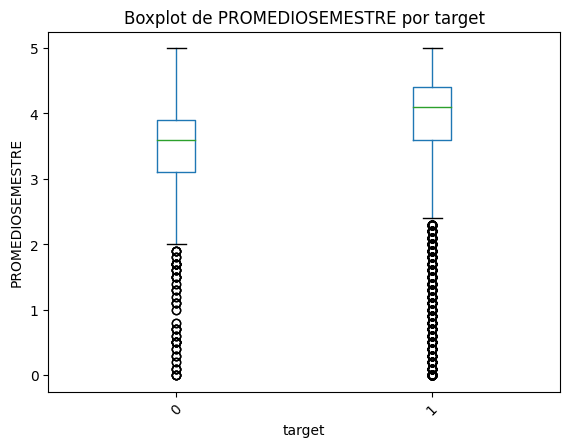

In [54]:
comparative_boxplot(df_copy, "target","PROMEDIOSEMESTRE")

top target: [1, 0]


<Figure size 12000x600 with 0 Axes>

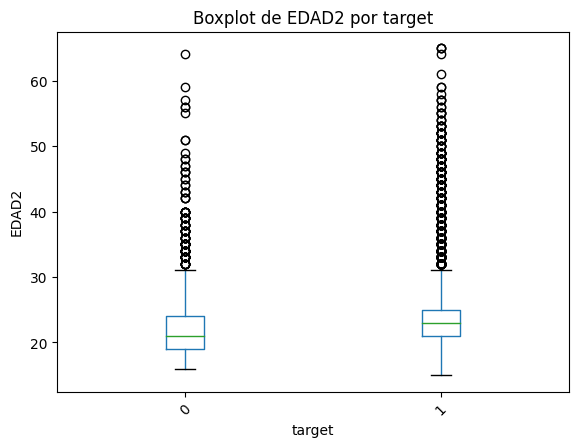

In [55]:
comparative_boxplot(df_copy, "target","EDAD2")

top target: [1, 0]


<Figure size 12000x600 with 0 Axes>

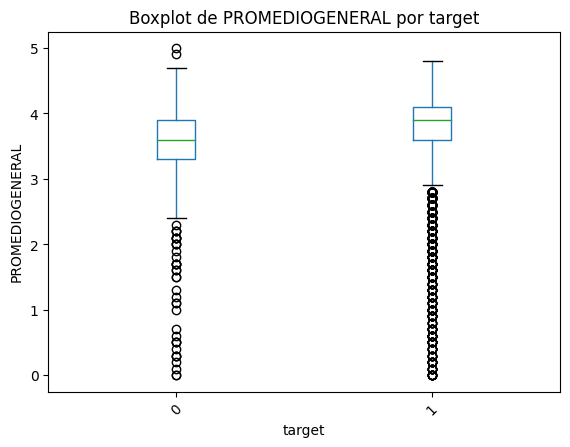

In [56]:
comparative_boxplot(df_copy, "target","PROMEDIOGENERAL")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


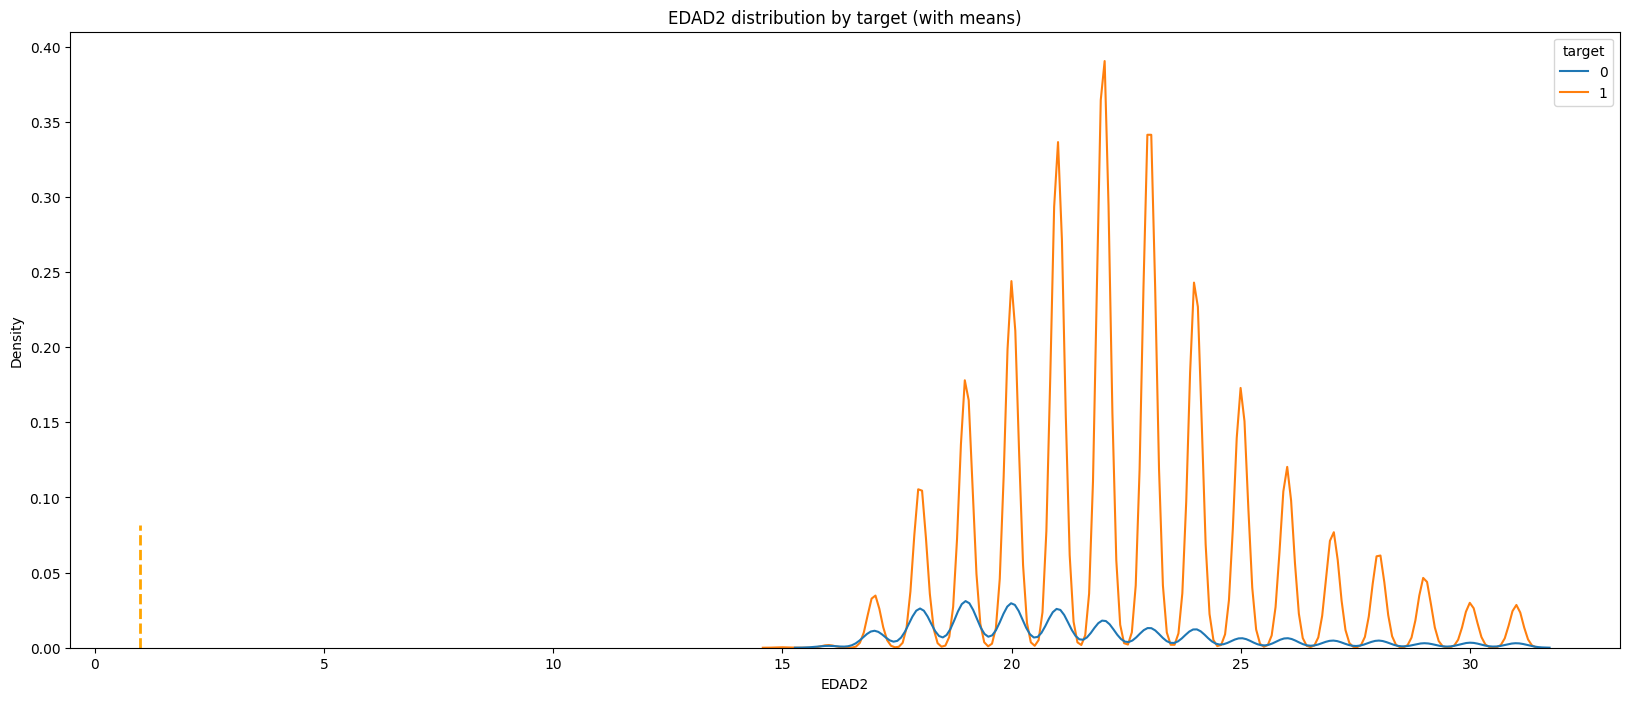

In [47]:
line_graph(df=df_copy, field="target", x_var="EDAD2")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


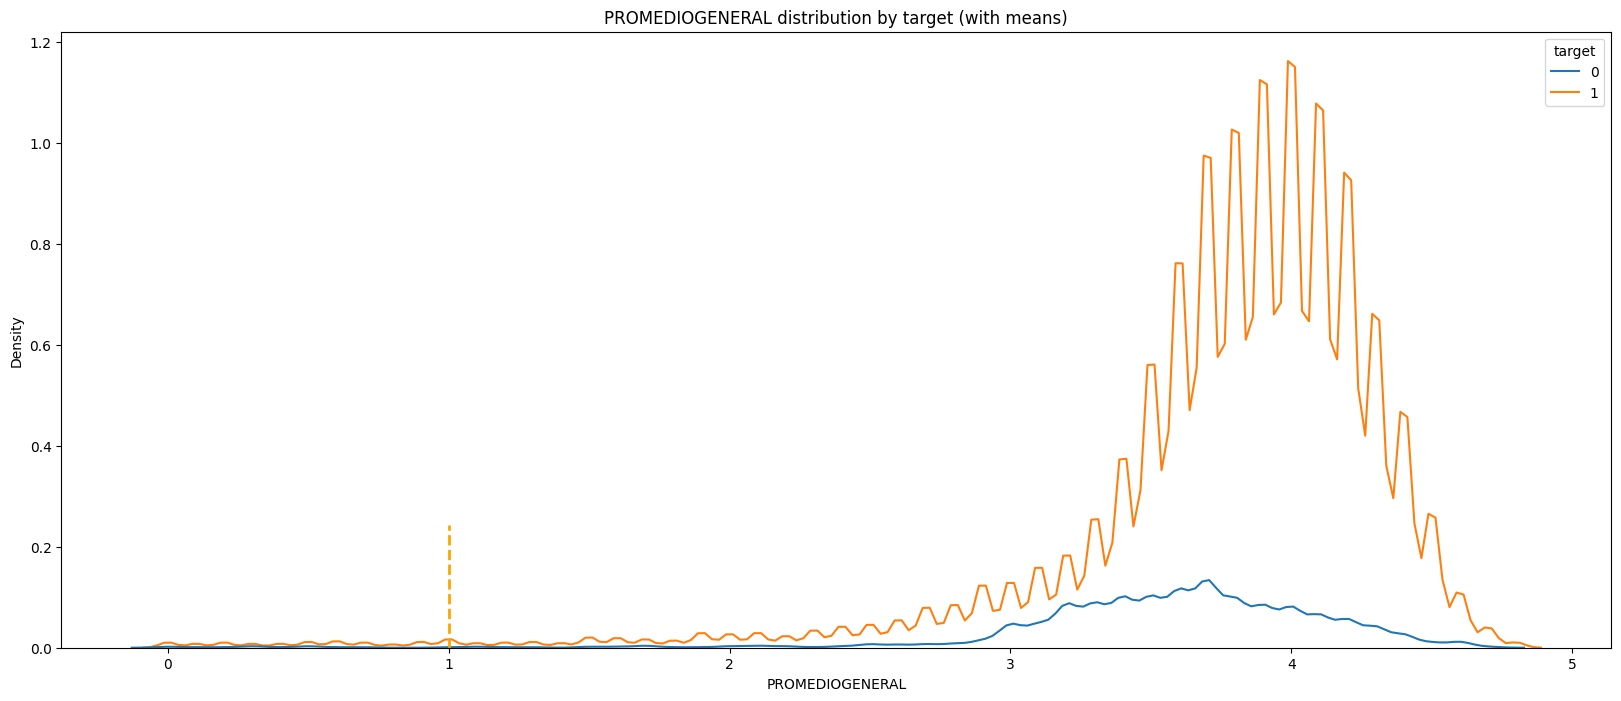

In [11]:
line_graph(df=df_copy, field="target", x_var="PROMEDIOGENERAL")

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


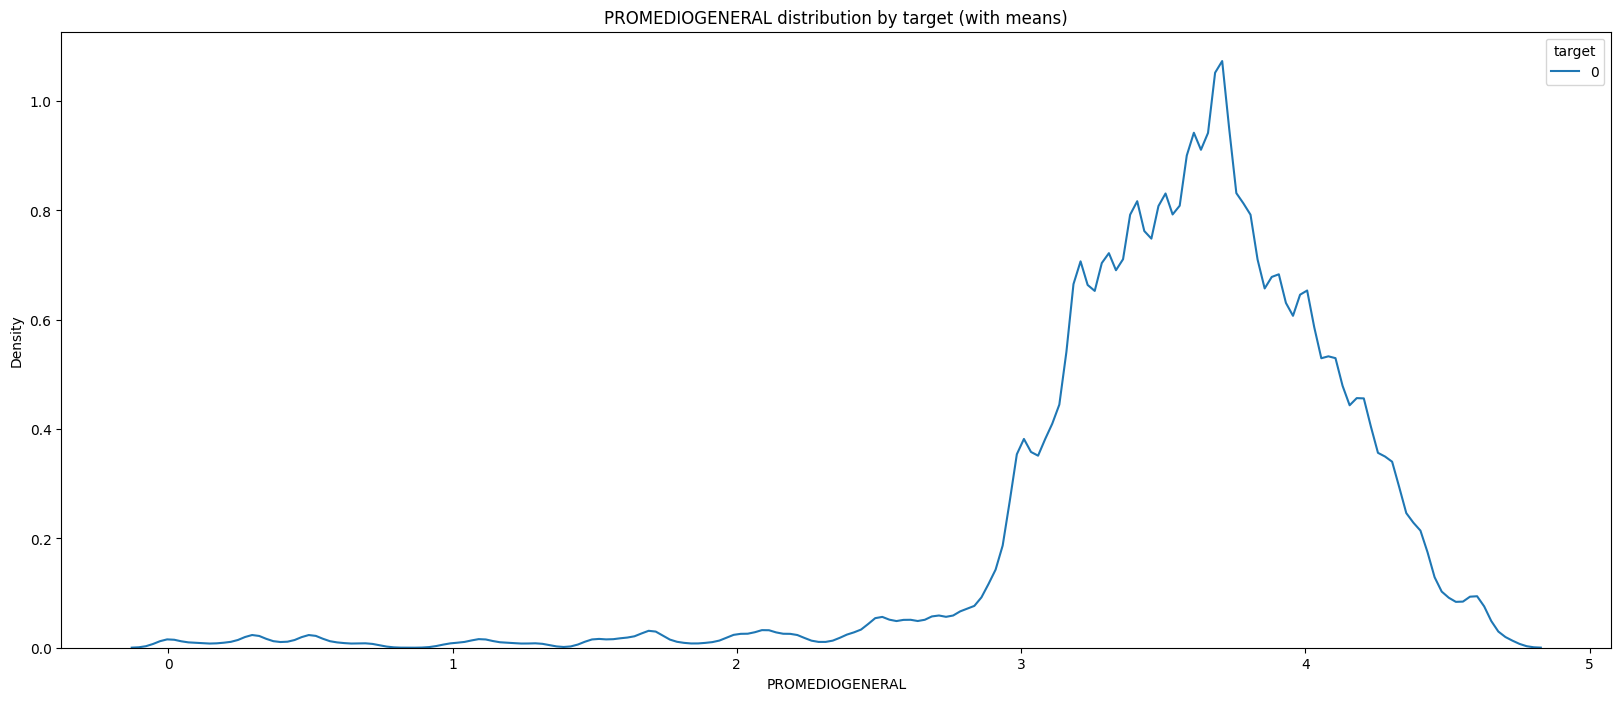

In [12]:
retirados=df[df["target"]==0]
line_graph(df=retirados, field="target", x_var="PROMEDIOGENERAL")

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


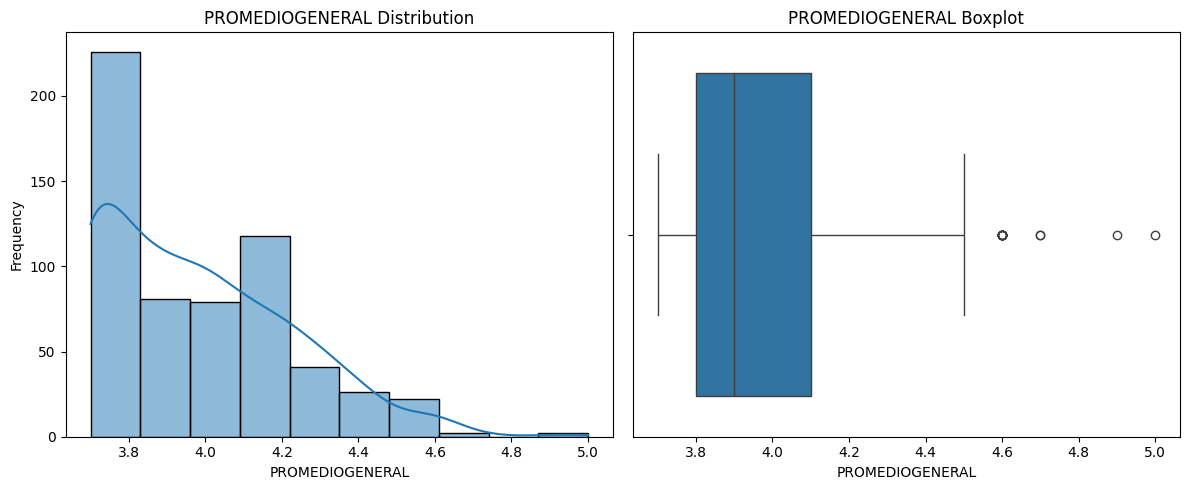

In [13]:
df_altos=retirados[retirados["PROMEDIOGENERAL"]>3.6]
histogram(df_altos, "PROMEDIOGENERAL")

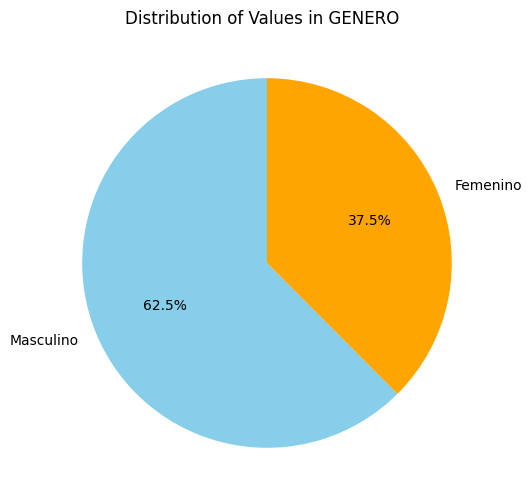

In [14]:
print_pie(df_altos, "GENERO")
#de los altos se van mas los genero 1.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


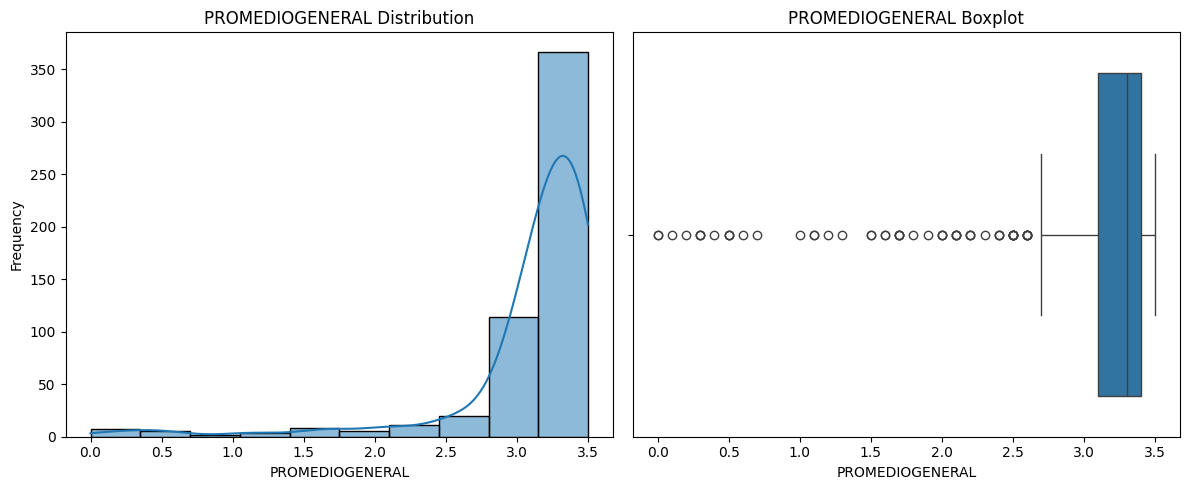

(543, 33)

In [15]:
df_bajos=retirados[retirados["PROMEDIOGENERAL"]<3.6]
histogram(df_bajos, "PROMEDIOGENERAL")
df_bajos.shape

In [16]:
df_bajos.columns

Index(['PERIODO_ACAENICO', 'CODIGO', 'UNIDAD', 'CODIGOPROGRAMA', 'PROGRAMA',
       'SEMESTRE', 'PROMEDIOSEMESTRE', 'GENERO', 'FECHANACIMIENTO', 'ESTRATO',
       'CIUDADRESIDENCIA', 'DEPARTAMENTORESICEDENCIA', 'ESTADOCIVIL',
       'PROMEDIOGENERAL', 'SITUACION_ACTUAL', 'CATEGORIA_ACTUAL',
       'SITUACION_DEL_PERIODO', 'CATEGORIA_DEL_PERIODO', 'DISCAPACIDAD',
       'TIPO_DISCAPACIDAD', 'FECHA_MATRICULA', 'IDCIUDADNACIMIENTO',
       'IDDEPARTAMENTONACIMIENTO', 'SISBEN', 'NIVELSISBEN', 'CANTIDAD',
       'PERIODO', 'EDAD2', 'EDAD', 'FACULTAD', 'NIVEL_FORMACION',
       'YEARNACIMIENTO', 'target'],
      dtype='object')

In [17]:
# Data Analysis
# Se va a analizar:

# Variable dependiente (y)
# tipos de variables (categorical y numerical)
# data faltante
# Variables numericas:
#   Discretas
#   Continuas
#   Distribuciones
#   Transformaciones
# Variables categoricas
#   Cardinalidad
#   Labels "raros"
#   Mappings especiales

# to handle datasets
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for the yeo-johnson transformation
import scipy.stats as stats


def dibuja_histograma( data, target_var , label):
  data[target_var].hist(bins=10, density=True)
  plt.ylabel(label)
  plt.xlabel(target_var)
  plt.show()

def remap_string_to_numbers(data, qual_vars):
  # re-map strings to numbers, which determine quality
  qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}
  for var in qual_vars:
    data[var] = data[var].map(qual_mappings)
  return data

def clasifica_variables( data, target_var):
  cat_vars = [var for var in data.columns if data[var].dtype == 'O']
  num_vars = [var for var in data.columns if var not in cat_vars and var != target_var]
  return cat_vars, num_vars

def print_dtypes(data):
  print(data.dtypes)

def valores_faltantes( data):
  # make a list of the variables that contain missing values
  vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]
  # determine percentage of missing values (expressed as decimals)
  # and display the result ordered by % of missin data
  #data[vars_with_na].isnull().mean().sort_values(ascending=False)
  data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10, 4))
  plt.ylabel('Percentage of missing data')
  plt.axhline(y=0.90, color='r', linestyle='-')
  plt.axhline(y=0.80, color='g', linestyle='-')
  plt.show()
  return vars_with_na

def analizar_valores_na(df, var, target_var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)[target_var].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title=target_var, color='green')

    plt.show()

def analizar_na(data, vars_with_na, target_var):
    for var in vars_with_na:
        analizar_valores_na(data, var, target_var)

def plot_continous_vars(data, cont_vars ):
    data[cont_vars].hist(bins=30, figsize=(15,15))
    plt.show()


def get_discrete_vars(data, year_vars, num_vars):
    #  let's male a list of discrete variables
    discrete_vars = [var for var in num_vars if len(data[var].unique()) < 20 and var not in year_vars]
    print('Variables discretas: ', len(discrete_vars))
    return discrete_vars

def cardinality(data, cat_vars):
    data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

def plot_discrete_vars(data, discrete_vars, target_var):
    for var in discrete_vars:
        # make boxplot with Catplot
        sns.catplot(x=var, y=target_var, data=data, kind="box", height=4, aspect=1.5)
        # add data points to boxplot with stripplot
        sns.stripplot(x=var, y=target_var, data=data, jitter=0.1, alpha=0.3, color='k')
        plt.show()


def get_continous_vars(data, year_vars, num_vars, discrete_vars):
    # make list of continuous variables
    cont_vars = [var for var in num_vars if var not in discrete_vars+year_vars]
    print('Variables continuas: ', len(cont_vars))
    return cont_vars

def get_other_cats(data, cat_vars, qual_vars ):
    cat_others = [var for var in cat_vars if var not in qual_vars]
    print("Other cats: %d" % len(cat_others))
    return cat_others

def analyze_rare_labels(df, var, rare_perc, target_var):
    df = df.copy()
    # determine the % of observations per category
    if var in df.columns:
      tmp = df.groupby(var)[target_var].count() / len(df)
      # return categories that are rare
      return tmp[tmp < rare_perc]

def analyze_all_rare_labels(data, cat_others, target_var ):
    print(cat_others)
    for var in cat_others:
      print(analyze_rare_labels(data, var, 0.01, target_var))
      print()

def plot_cats(data, cat_others, target_var):
    for var in cat_others:
      # make boxplot with Catplot
      sns.catplot(x=var, y=target_var, data=data, kind="box", height=4, aspect=1.5)
      # add data points to boxplot with stripplot
      sns.stripplot(x=var, y=target_var, data=data, jitter=0.1, alpha=0.3, color='k')
      plt.show()

def quantities(df, var, target_var):
    x=df.groupby(var)[target_var].count()
    print(x)

def get_target_var(data):
    return "total_cases"



Revision de los retirados.

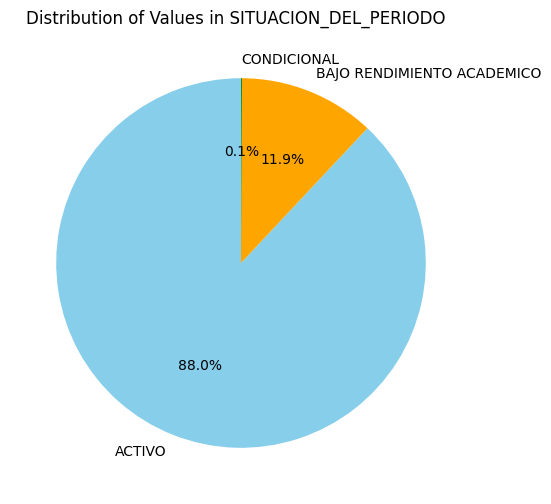

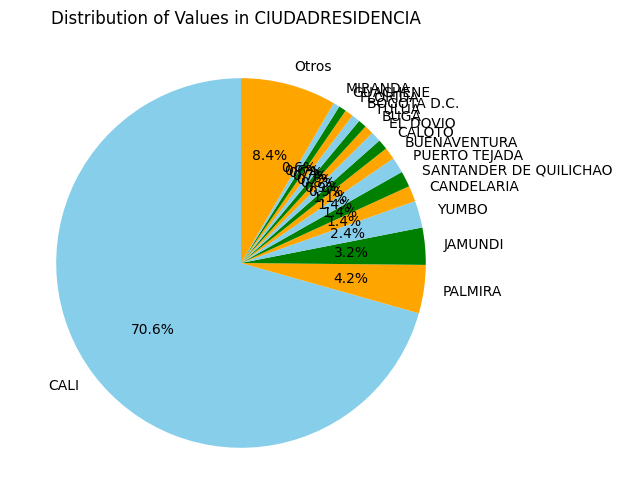

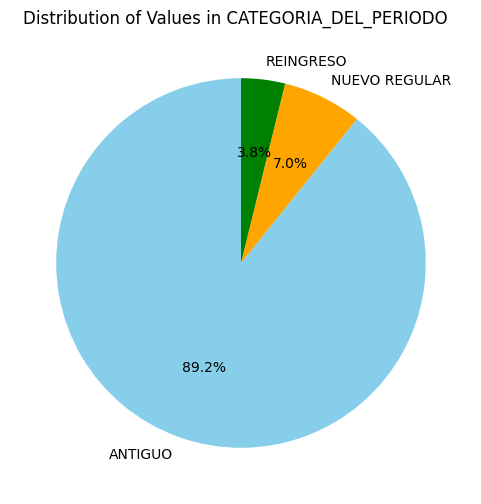

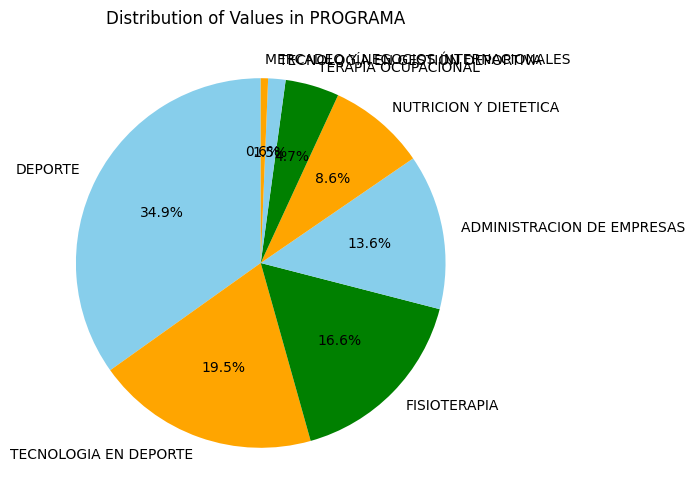

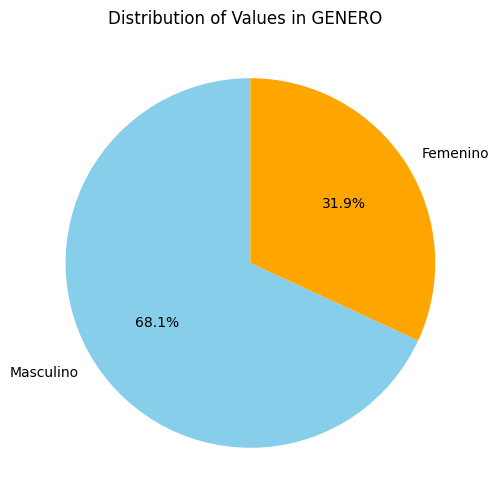

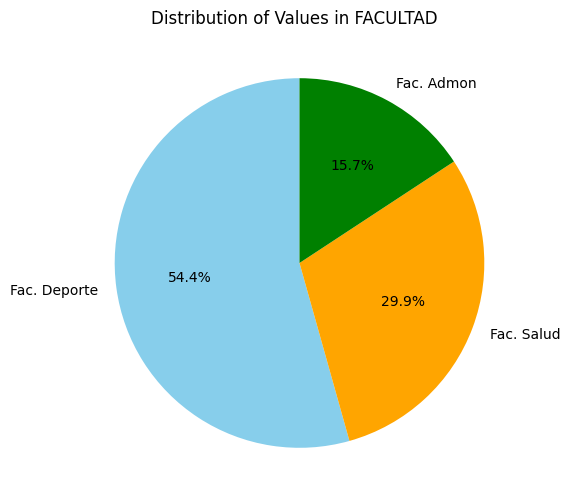

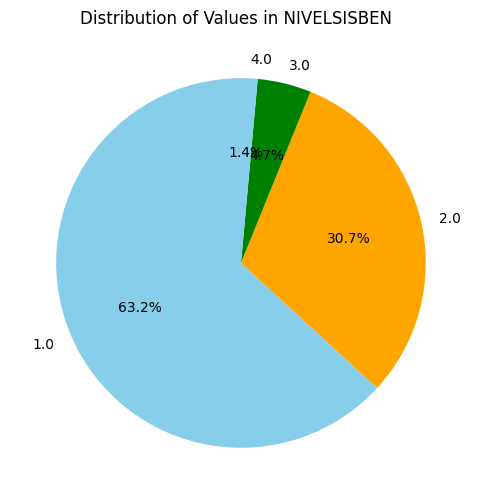

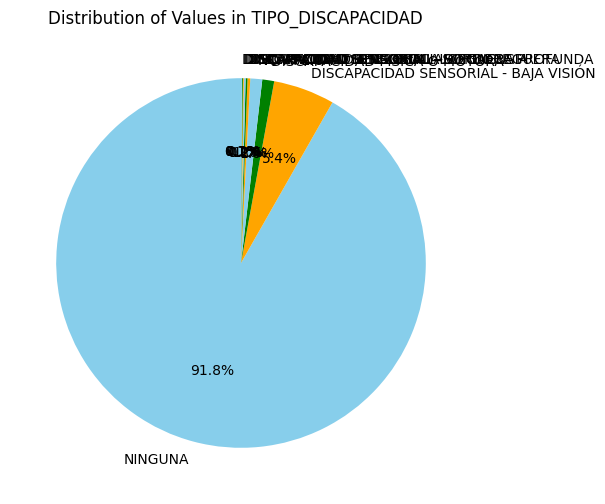

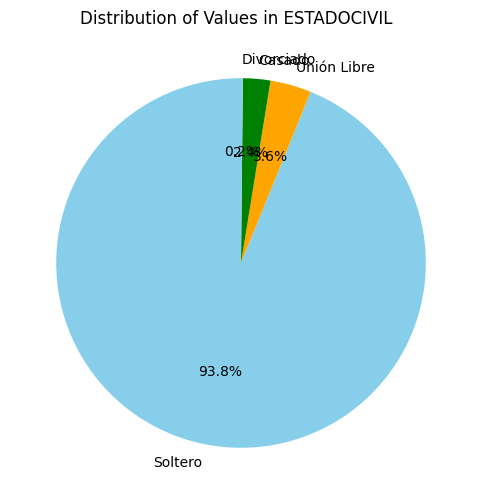

In [73]:
disc_vars=['IDCIUDADNACIMIENTO','ESTRATO','SITUACION_DEL_PERIODO','CIUDADRESIDENCIA','CATEGORIA_DEL_PERIODO','CODIGOPROGRAMA','GENERO','FACULTAD','NIVELSISBEN','TIPO_DISCAPACIDAD','ESTADOCIVIL','UNIDAD','CANTIDAD']
cont_vars=['PROMEDIOSEMESTRE','PROMEDIOGENERAL', 'EDAD2', 'YEARNACIMIENTO']

print_pie(retirados, "SITUACION_DEL_PERIODO")
print_pie(retirados, "CIUDADRESIDENCIA")
print_pie(retirados, "CATEGORIA_DEL_PERIODO")
print_pie(retirados, "PROGRAMA")
print_pie(retirados, "GENERO")
print_pie(retirados, "FACULTAD")
print_pie(retirados, "NIVELSISBEN")
print_pie(retirados, "TIPO_DISCAPACIDAD")
print_pie(retirados, "ESTADOCIVIL")

#for v in disc_vars:
#    histogram_object(retirados, v)

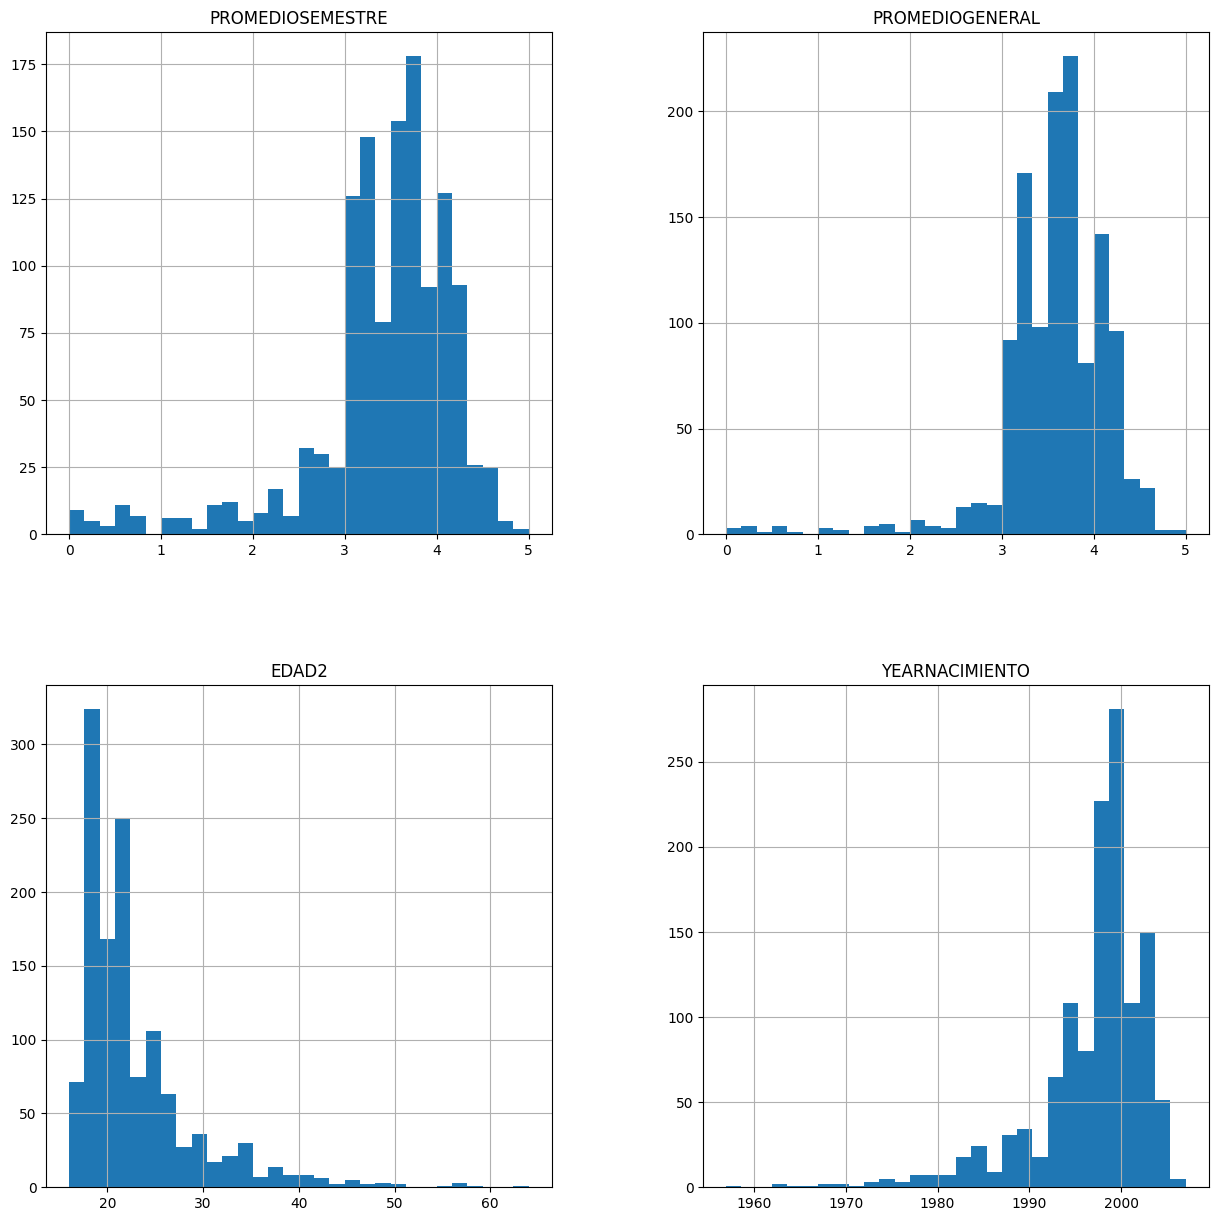

In [74]:
plot_continous_vars(retirados, cont_vars)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


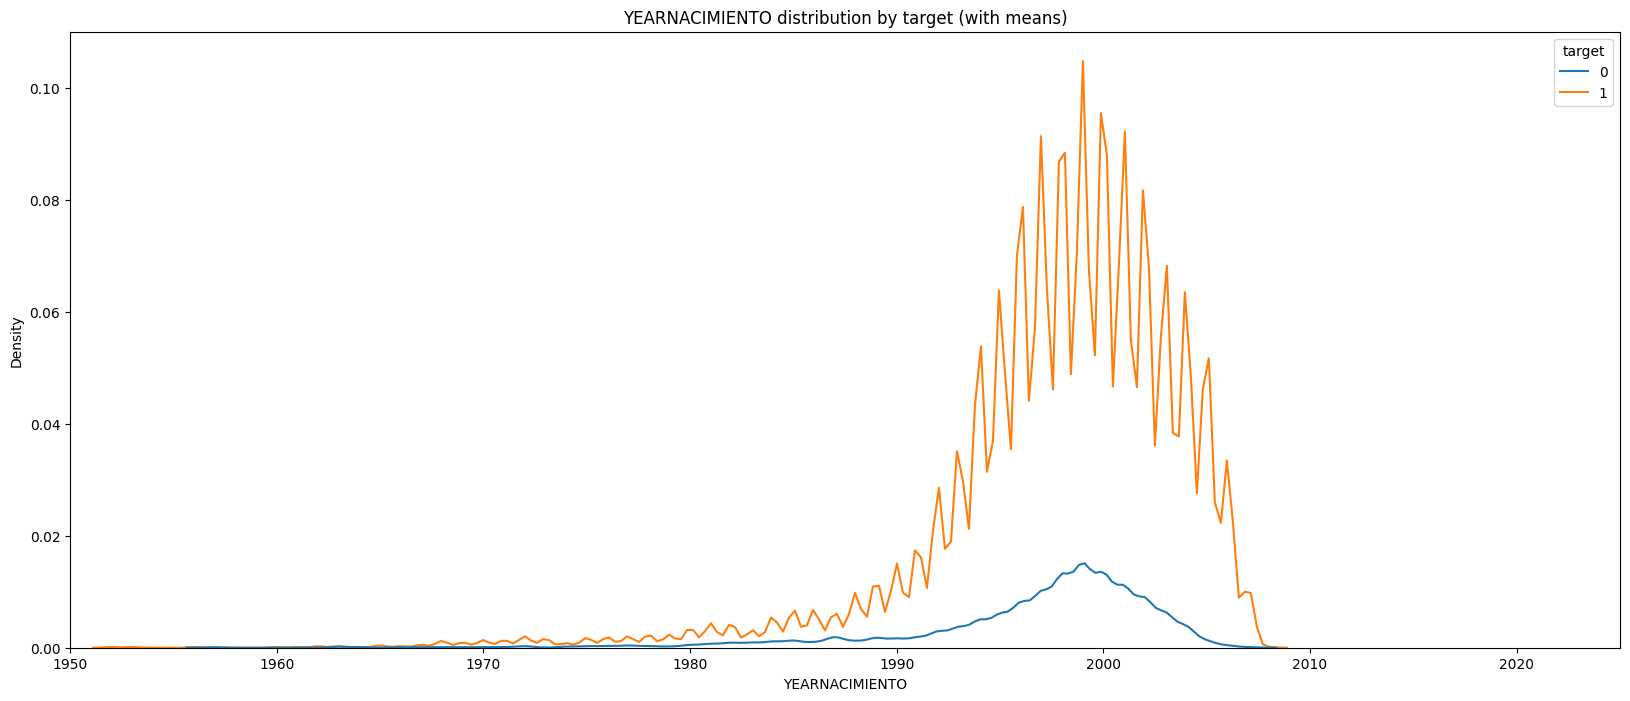

In [75]:
line_graph(df=df_copy[ (df_copy["YEARNACIMIENTO"]>1900) & (df_copy["YEARNACIMIENTO"]<2100) ], field="target", x_var="YEARNACIMIENTO")

top target: [1, 0]


<Figure size 12000x600 with 0 Axes>

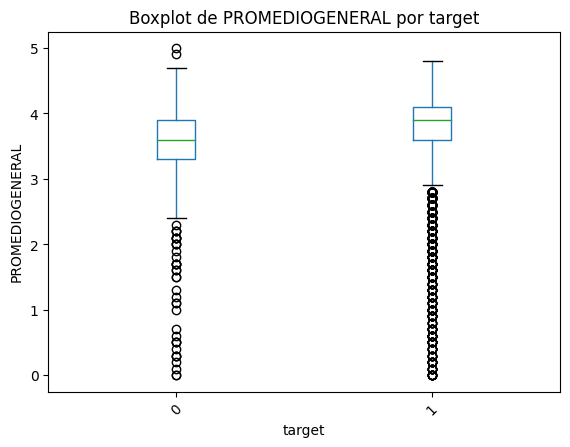

In [48]:
def comparative_boxplot(df, field, target_var="target"):
  field_count = df[field].value_counts(dropna=False, normalize=True)
  top = field_count.index.tolist()
  if len(top) > 10:
    top = top[:10]
  print(f"top {field}:", top)
  plt.figure(figsize=(120, 6))
  df[df[field].isin( top )].boxplot(column= target_var , by=field, grid=False)
  plt.title(f'Boxplot de {target_var} por {field}')
  plt.suptitle('')  # Eliminar el título superior automático
  plt.xlabel(field)
  plt.ylabel(  target_var )

  plt.xticks(rotation=45)
  plt.show()

comparative_boxplot(df_copy, "target","PROMEDIOGENERAL")

In [22]:
#df[df["target"]==0].boxplot(column="PROMEDIOGENERAL" , by="target", grid=False)
df[df["target"]==0]["PROMEDIOGENERAL"].describe()


,PROMEDIOGENERAL
count,1251.00
mean,3.57
std,0.60
min,0.00
25%,3.30
50%,3.60
75%,3.90
max,5.00


In [23]:
df[df["target"]==1]["PROMEDIOGENERAL"].describe()

,PROMEDIOGENERAL
count,8770.00
mean,3.77
std,0.60
min,0.00
25%,3.60
50%,3.90
75%,4.10
max,4.80


Prueba estadistica. Para determinar si las poblaciones de retirados y no-retirados tienen le misma media de PROMEDIOGENERAL. SE encuentra que SI existen diferencias significativas estadisticamente.

In [76]:
from scipy.stats import ttest_ind, shapiro, mannwhitneyu, chi2_contingency

def statistic_test( df, field="cluster", selected_groups=[], col="price"):
  print(df[field].value_counts())

  #Step0: Choose the appropriate test: t-test vs. Mann-Whitney.

  #step1: define null and alernative hypothesis
  #     Ho:  u1=u2
  #     H1:  u1!=u2


  #Step2: Define the significance level
  alpha = 0.01

  #Step3-4: calculate the statistic and p-value
  # Assuming normality
  t_stat, p_value = ttest_ind(
      df.loc[df[field] == selected_groups[0], col ],
      df.loc[df[field] == selected_groups[1], col ],
      equal_var=False
  )
  print("T-statistic:", t_stat)
  print("P-value:", p_value)

  # Testing normality for each group
  print(f"{selected_groups[0]}:", shapiro( df.loc[ df[field] == selected_groups[0], col])[1])
  print(f"{selected_groups[1]}:", shapiro( df.loc[ df[field] == selected_groups[1], col])[1])

  # Applying a non-parametric test
  t_stat, p_value = mannwhitneyu(
      df.loc[ df[field] == selected_groups[0], col],
      df.loc[ df[field] == selected_groups[1], col]
  )

  print("T-statistic:", t_stat)
  print("P-value:", p_value)

  #Step5: Make the decision

  if p_value <= alpha:
      print(f"REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is statistically significant.")
  else:
      print(f"FAIL TO REJECT THE NULL HYPOTHESIS: The difference in listing price between {selected_groups[0]} and {selected_groups[1]} groups is not statistically significant.")



selected_groups=[0,1]
statistic_test(df=df, field="target", selected_groups=selected_groups, col="PROMEDIOGENERAL" )



target
1    8770
0    1251
Name: count, dtype: int64
T-statistic: -11.101209029967658
P-value: 1.1720477873469843e-27
0: 1.340675418118501e-33
1: 4.359644768489606e-74
T-statistic: 3916262.0
P-value: 9.786279388350339e-61
REJECT THE NULL HYPOTHESIS: The difference in listing price between 0 and 1 groups is statistically significant.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8770.
  res = hypotest_fun_out(*samples, **kwds)


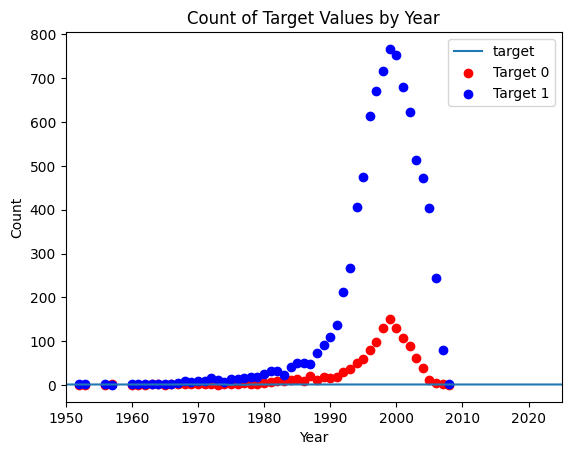

In [25]:
df_copy[ (df_copy["YEARNACIMIENTO"]>1900) & (df_copy["YEARNACIMIENTO"]<2100) ]['target'].plot()
def plot_years(df, year_col="YEARNACIMIENTO", target_col='target'):

  # Step 1: Count the occurrences of target values (0 and 1) for each year
  counts = df.groupby([year_col, target_col]).size().unstack(fill_value=0)

  # Step 2: Plot scatter graph
  plt.scatter(counts.index, counts[0], color='red', label='Target 0')
  plt.scatter(counts.index, counts[1], color='blue', label='Target 1')

  # Add labels and legend
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.xlim(1950, 2025)  # Set x-axis limits
  plt.title('Count of Target Values by Year')
  plt.legend()

  # Show the plot
  plt.show()
plot_years( df_copy )

**CONCLUSION **  El promedio es un indicador del posible retiro del estudiante. Se proponen estrategias como:  


*   Para promedios menores a 3.6 apoyo academico, en forma de tutores o buddies/hermanos mayores que eviten la desercion.
*   Para promedio mayores a 3.6 apoyo economico o sicologico dependiendo del caso.


